# Introduction 
The dataset used in this analysis is the "500 Cities: Local Data for Better Health, 2018" obtained from the Kaggle website (https://www.kaggle.com/datasets/jennifersantiago/500-cities-local-data-for-better-health-2018). It contains data for the 500 largest cities within the US. The dataset has 810103 rows and 25 columns that include information such as state, city name, population, geolocation, and 27 measures for chronic disease related to unhealthy behaviors, health outcomes, and use of preventive services. Our dataset has a total of 7 float, 2 int, and 16 object/categorical values. 

# Problem Statement: 
A pharmacy company wants to launch a drug for diabetes in one of the following states: CA, TX, FL, and NY. The drug is primarily intended for the treatment of diabetes, but it may also have potential benefits for improving mental and physical health.

The aim of this data visualization project is to provide insights into the prevalence of unhealthy behaviors, preventive measures taken by the population, and the trend of diabetes in four states for the year of 2016.

Using data visualization techniques such as pie charts, bar graphs, line graphs, and heat maps, the project aims to identify the top state with the highest number of people with diabetes and recommend a city for the launch of the medicine.

# Importing Packages 

'''
if not installed, please remove # and install either of the pip until you get requirement satisfied depending on which python version you have
'''

In [33]:
!pip install folium
!pip install folium --upgrade

     |████████████████████████████████| 102 kB 1.8 MB/s ta 0:00:01


In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Data

In [3]:
#display all columns and rows in the dataframe
df = pd.read_csv("500_Cities.csv")
df

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,Longitude,Latitude,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,76794,-85.969311,39.958764,HLTHOUT,BPHIGH,1823278.0,NaN,High Blood Pressure
1,2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,647766,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,66790,-121.892083,37.433870,HLTHOUT,BPHIGH,647766.0,NaN,High Blood Pressure
2,2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,973000,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,122643,-73.558936,41.104914,HLTHOUT,BPHIGH,973000.0,NaN,High Blood Pressure
3,2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,622020,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,153015,-121.384138,38.415999,HLTHOUT,BPHIGH,622020.0,NaN,High Blood Pressure
4,2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Y...,%,...,NaN,NaN,103190,-80.666672,27.983826,PREVENT,CHOLSCREEN,1254000.0,NaN,Cholesterol Screening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810098,2016,CA,California,Clovis,Census Tract,BRFSS,Unhealthy Behaviors,0614218-06019005911,Binge drinking among adults aged >=18 Years,%,...,NaN,NaN,3346,-119.650326,36.794597,UNHBEH,BINGE,614218.0,6.019006e+09,Binge Drinking
810099,2016,CA,California,Fremont,Census Tract,BRFSS,Unhealthy Behaviors,0626000-06001442400,Current smoking among adults aged >=18 Years,%,...,NaN,NaN,6253,-121.973779,37.531381,UNHBEH,CSMOKING,626000.0,6.001442e+09,Current Smoking
810100,2016,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003009400,Coronary heart disease among adults aged >=18 ...,%,...,NaN,NaN,5155,-158.038204,21.494248,HLTHOUT,CHD,15003.0,1.500301e+10,Coronary Heart Disease
810101,2016,CA,California,Los Angeles,Census Tract,BRFSS,Health Outcomes,0644000-06037211410,Mental health not good for >=14 days among adu...,%,...,NaN,NaN,3095,-118.307316,34.072614,HLTHOUT,MHLTH,644000.0,6.037211e+09,Mental Health


In [4]:
#display column names in dataframe
df.columns 

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'Longitude', 'Latitude', 'CategoryID', 'MeasureId', 'CityFIPS',
       'TractFIPS', 'Short_Question_Text'],
      dtype='object')

In [5]:
#rename columns so they are uniformed
df.rename(
    columns={'StateAbbr':'State Abbr', 'StateDesc':'State Desc', 'CityName':'City Name', 'GeographicLevel':'Geographic Level',
       'DataSource':'Data Source', 'UniqueID':'Unique ID','Data_Value_Unit':'Data Value Unit',
       'DataValueTypeID':'Data Value Type ID', 'Data_Value_Type':'Data Value Type', 'Data_Value':'Data Value',
       'Low_Confidence_Limit':'Low Confidence Limit', 'High_Confidence_Limit':'High Confidence Limit',
       'Data_Value_Footnote_Symbol':'Data Value Footnote Symbol', 'Data_Value_Footnote':'Data Value Footnote','PopulationCount':'Population Count', 'CategoryID':'Category ID', 'MeasureId':'Measure ID', 'CityFIPS':'City FIPS',
       'TractFIPS':'Tract FIPS'}, inplace=True)

In [6]:
#top 5 rows and all columns in dataframe
df.head()

,Year,State Abbr,State Desc,City Name,Geographic Level,Data Source,Category,Unique ID,Measure,Data Value Unit,...,Data Value Footnote Symbol,Data Value Footnote,Population Count,Longitude,Latitude,Category ID,Measure ID,City FIPS,Tract FIPS,Short_Question_Text
0,2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,76794,-85.969311,39.958764,HLTHOUT,BPHIGH,1823278.0,NaN,High Blood Pressure
1,2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,647766,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,66790,-121.892083,37.433870,HLTHOUT,BPHIGH,647766.0,NaN,High Blood Pressure
2,2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,973000,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,122643,-73.558936,41.104914,HLTHOUT,BPHIGH,973000.0,NaN,High Blood Pressure
3,2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,622020,High blood pressure among adults aged >=18 Years,%,...,NaN,NaN,153015,-121.384138,38.415999,HLTHOUT,BPHIGH,622020.0,NaN,High Blood Pressure
4,2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Y...,%,...,NaN,NaN,103190,-80.666672,27.983826,PREVENT,CHOLSCREEN,1254000.0,NaN,Cholesterol Screening


In [7]:
#bottom 5 rows and all columns in dataframe
df.tail()

,Year,State Abbr,State Desc,City Name,Geographic Level,Data Source,Category,Unique ID,Measure,Data Value Unit,...,Data Value Footnote Symbol,Data Value Footnote,Population Count,Longitude,Latitude,Category ID,Measure ID,City FIPS,Tract FIPS,Short_Question_Text
810098,2016,CA,California,Clovis,Census Tract,BRFSS,Unhealthy Behaviors,0614218-06019005911,Binge drinking among adults aged >=18 Years,%,...,NaN,NaN,3346,-119.650326,36.794597,UNHBEH,BINGE,614218.0,6.019006e+09,Binge Drinking
810099,2016,CA,California,Fremont,Census Tract,BRFSS,Unhealthy Behaviors,0626000-06001442400,Current smoking among adults aged >=18 Years,%,...,NaN,NaN,6253,-121.973779,37.531381,UNHBEH,CSMOKING,626000.0,6.001442e+09,Current Smoking
810100,2016,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003009400,Coronary heart disease among adults aged >=18 ...,%,...,NaN,NaN,5155,-158.038204,21.494248,HLTHOUT,CHD,15003.0,1.500301e+10,Coronary Heart Disease
810101,2016,CA,California,Los Angeles,Census Tract,BRFSS,Health Outcomes,0644000-06037211410,Mental health not good for >=14 days among adu...,%,...,NaN,NaN,3095,-118.307316,34.072614,HLTHOUT,MHLTH,644000.0,6.037211e+09,Mental Health
810102,2016,TX,Texas,Dallas,Census Tract,BRFSS,Health Outcomes,4819000-48085031719,All teeth lost among adults aged >=65 Years,%,...,NaN,NaN,1733,-96.774877,32.994350,HLTHOUT,TEETHLOST,4819000.0,4.808503e+10,Teeth Loss


In [8]:
#total number of non-missing values in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        810103 non-null  int64  
 1   State Abbr                  810103 non-null  object 
 2   State Desc                  810103 non-null  object 
 3   City Name                   810047 non-null  object 
 4   Geographic Level            810103 non-null  object 
 5   Data Source                 810103 non-null  object 
 6   Category                    810103 non-null  object 
 7   Unique ID                   810103 non-null  object 
 8   Measure                     810103 non-null  object 
 9   Data Value Unit             810103 non-null  object 
 10  Data Value Type ID          810103 non-null  object 
 11  Data Value Type             810103 non-null  object 
 12  Data Value                  787311 non-null  float64
 13  Low Confidence

In [9]:
#total number of missing values in dataframe
df.isna().sum()

Year                               0
State Abbr                         0
State Desc                         0
City Name                         56
Geographic Level                   0
Data Source                        0
Category                           0
Unique ID                          0
Measure                            0
Data Value Unit                    0
Data Value Type ID                 0
Data Value Type                    0
Data Value                     22792
Low Confidence Limit           22792
High Confidence Limit          22792
Data Value Footnote Symbol    787309
Data Value Footnote           787309
Population Count                   0
Longitude                         56
Latitude                          56
Category ID                        0
Measure ID                         0
City FIPS                         56
Tract FIPS                     28056
Short_Question_Text                0
dtype: int64

In [10]:
#check for duplicate values to ensure each row and observation is unique 
df.duplicated().any()

False

In [11]:
#total dataframe size
df.size

20252575

In [12]:
#number of rows and columns in data frame
df.shape

(810103, 25)

In [13]:
#percentage of missing data in dataframe
df.isna().sum().sum()/df.size * 100

8.252155590091629

# Cleaning and Transforming Data

### Preparing the dataset for visualizations
The variables in the dataset were used to analyze and visualize the data. Each variable provided specific information that was relevant to our problem statement and helped us gain insights into the data. For example, the 'Year' variable gave us information on when the data was collected, the 'State Desc' variable provided information on the state where the data was collected, the 'Category' variable gave us information on the health category the data pertains to, and so on.

Regarding why some variables were not used in the analysis and visualization, it is because they were not relevant to our problem statement or did not provide any valuable insights. For example, the 'Data Source' variable is not relevant to our problem statement, and the 'Data Value Footnote Symbol' variable does not provide any valuable insights. In such cases, it is better to exclude these variables from our analysis and visualization to make the process more efficient and focused.

In order to handle the missing values in our dataset, we first removed all the rows that had missing values in the 'City Name' column by using the 'notna()' function. This helped us in getting rid of the observations where the location information was not available. Next, we dealt with the missing values in the 'Data Value' column by imputing them with the mean of the respective group. We grouped the dataset by 'State Desc', 'Measure', 'Category', and 'City Name' and filled in the missing values in the 'Data Value' column with the mean value of the respective group.

Furthermore, we filter the dataset to only include rows from the year 2016, where the geographical level is city, and where the state description is either Florida, Texas, California, or New York. Next, we sort the dataset by state description, city name, and measure. Then we created a new column called "Prevalence Population" by multiplying the data value and population count columns and dividing the result by 100. Finally, we group the remaining rows by city name and measure, calculate the mean of the data value and population count columns, and take the first value for all other columns. 

The resulting dataset contains unique rows for each city and measures combination, with aggregated information about the data value, population count, and prevalence population.

In [14]:
#filtering the columns to our desired categories for visualization 
df = df[['Year', 'State Desc', 'City Name', 'Geographic Level', 'Category', 'Measure', 'Data Value', 'Population Count', 'Latitude', 'Longitude', 'Measure ID']]

#checking for null values 
df.isna().sum()

Year                    0
State Desc              0
City Name              56
Geographic Level        0
Category                0
Measure                 0
Data Value          22792
Population Count        0
Latitude               56
Longitude              56
Measure ID              0
dtype: int64

In [15]:
#removing the rows where the value of the column City Name is null
df = df[df['City Name'].notna()]

#checking for null values 
df.isna().sum()

Year                    0
State Desc              0
City Name               0
Geographic Level        0
Category                0
Measure                 0
Data Value          22792
Population Count        0
Latitude                0
Longitude               0
Measure ID              0
dtype: int64

In [16]:
#replacing null values in the Data Value column with the mean for each group
df['Data Value'] = df.groupby(['State Desc', 'Measure', 'Category', 'City Name'])['Data Value'].transform(lambda x: x.fillna(x.mean()))

#filtering the rows where the value of the Year column is 2016
df = df[df['Year'] == 2016]

#filtering the rows where the Geographical Level is City
df = df[df['Geographic Level'] == 'City']

#filtering the rows where the value of the column State Desc is Florida, Texas, or California
df = df[df['State Desc'].isin(['Florida', 'Texas', 'California', 'New York'])]

#sorting the dataset by State Desc, City Name, and Measure
df.sort_values(by=['State Desc','City Name', 'Measure'])

#rounding the Population Count to an integer 
df['Population Count'].round().astype(int)

#displaying new dataframe
df


,Year,State Desc,City Name,Geographic Level,Category,Measure,Data Value,Population Count,Latitude,Longitude,Measure ID
47,2016,California,Lancaster,City,Health Outcomes,Diagnosed diabetes among adults aged >=18 Years,10.4,156633,34.693435,-118.175306,DIABETES
84,2016,Texas,Fort Worth,City,Health Outcomes,All teeth lost among adults aged >=65 Years,17.2,741206,32.780193,-97.347032,TEETHLOST
177,2016,California,Lynwood,City,Health Outcomes,All teeth lost among adults aged >=65 Years,18.0,69772,33.923962,-118.201648,TEETHLOST
202,2016,Texas,Brownsville,City,Health Outcomes,Stroke among adults aged >=18 Years,3.7,175023,25.998198,-97.456634,STROKE
212,2016,Texas,Frisco,City,Health Outcomes,All teeth lost among adults aged >=65 Years,7.3,116989,33.150755,-96.820134,TEETHLOST
...,...,...,...,...,...,...,...,...,...,...,...
809464,2016,California,Burbank,City,Health Outcomes,Physical health not good for >=14 days among a...,10.7,103340,34.187980,-118.323429,PHLTH
809477,2016,Florida,Tallahassee,City,Prevention,Papanicolaou smear use among adult women aged ...,84.3,181376,30.454895,-84.252646,PAPTEST
809797,2016,Texas,Denton,City,Prevention,Older adult women aged >=65 Years who are up t...,32.6,113383,33.215616,-97.141244,COREW
809853,2016,California,Norwalk,City,Prevention,Older adult women aged >=65 Years who are up t...,31.0,105549,33.906881,-118.082915,COREW


In [17]:
#checking for null values 
df.isna().sum()

Year                0
State Desc          0
City Name           0
Geographic Level    0
Category            0
Measure             0
Data Value          0
Population Count    0
Latitude            0
Longitude           0
Measure ID          0
dtype: int64

In [18]:
'''
creating a new column and calculating the prevalence population by
1. multiplying the Data Value with the Population Count 
2. dividing the total by 100
3. round and convert the result to an integer 
'''

df['Prevalence Population'] = (df['Data Value'] * df['Population Count'] / 100).round().astype(int)

#displaying new dataframe
df

,Year,State Desc,City Name,Geographic Level,Category,Measure,Data Value,Population Count,Latitude,Longitude,Measure ID,Prevalence Population
47,2016,California,Lancaster,City,Health Outcomes,Diagnosed diabetes among adults aged >=18 Years,10.4,156633,34.693435,-118.175306,DIABETES,16290
84,2016,Texas,Fort Worth,City,Health Outcomes,All teeth lost among adults aged >=65 Years,17.2,741206,32.780193,-97.347032,TEETHLOST,127487
177,2016,California,Lynwood,City,Health Outcomes,All teeth lost among adults aged >=65 Years,18.0,69772,33.923962,-118.201648,TEETHLOST,12559
202,2016,Texas,Brownsville,City,Health Outcomes,Stroke among adults aged >=18 Years,3.7,175023,25.998198,-97.456634,STROKE,6476
212,2016,Texas,Frisco,City,Health Outcomes,All teeth lost among adults aged >=65 Years,7.3,116989,33.150755,-96.820134,TEETHLOST,8540
...,...,...,...,...,...,...,...,...,...,...,...,...
809464,2016,California,Burbank,City,Health Outcomes,Physical health not good for >=14 days among a...,10.7,103340,34.187980,-118.323429,PHLTH,11057
809477,2016,Florida,Tallahassee,City,Prevention,Papanicolaou smear use among adult women aged ...,84.3,181376,30.454895,-84.252646,PAPTEST,152900
809797,2016,Texas,Denton,City,Prevention,Older adult women aged >=65 Years who are up t...,32.6,113383,33.215616,-97.141244,COREW,36963
809853,2016,California,Norwalk,City,Prevention,Older adult women aged >=65 Years who are up t...,31.0,105549,33.906881,-118.082915,COREW,32720


In [19]:
#grouping together the rows based on city name and measure, then using the aggregate return the desired values  
c = {'Year':'first', 'State Desc':'first', 'City Name':'first', 'Geographic Level':'first', 'Category':'first', 'Measure':'first', 'Data Value':'mean', 'Population Count':'mean', 'Latitude':'mean', 'Longitude':'mean','Measure ID':'first', 'Prevalence Population':'mean'}
df = df.groupby(['City Name', 'Measure'], as_index=False).aggregate(c).reindex(columns=df.columns)  
df

,Year,State Desc,City Name,Geographic Level,Category,Measure,Data Value,Population Count,Latitude,Longitude,Measure ID,Prevalence Population
0,2016,Texas,Abilene,City,Health Outcomes,All teeth lost among adults aged >=65 Years,15.65,117063.0,32.454651,-99.738304,TEETHLOST,18320.5
1,2016,Texas,Abilene,City,Health Outcomes,Arthritis among adults aged >=18 Years,24.30,117063.0,32.454651,-99.738304,ARTHRITIS,28446.5
2,2016,Texas,Abilene,City,Unhealthy Behaviors,Binge drinking among adults aged >=18 Years,17.60,117063.0,32.454651,-99.738304,BINGE,20603.0
3,2016,Texas,Abilene,City,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,5.90,117063.0,32.454651,-99.738304,CANCER,6907.0
4,2016,Texas,Abilene,City,Health Outcomes,Chronic kidney disease among adults aged >=18 ...,3.00,117063.0,32.454651,-99.738304,KIDNEY,3512.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5011,2016,New York,Yonkers,City,Health Outcomes,Physical health not good for >=14 days among a...,12.80,195976.0,40.946503,-73.863696,PHLTH,25085.0
5012,2016,New York,Yonkers,City,Unhealthy Behaviors,Sleeping less than 7 hours among adults aged >...,36.50,195976.0,40.946503,-73.863696,SLEEP,71531.0
5013,2016,New York,Yonkers,City,Health Outcomes,Stroke among adults aged >=18 Years,3.05,195976.0,40.946503,-73.863696,STROKE,5977.0
5014,2016,New York,Yonkers,City,Prevention,Visits to dentist or dental clinic among adult...,62.85,195976.0,40.946503,-73.863696,DENTAL,123171.0


# Visualizations

### Pie Chart
Create four pie charts to display all the unhealthy behaviors for four states: CA, TX, FL, and NY. Each pie chart should show the percentage of people engaging in unhealthy behaviors such as smoking, excessive alcohol consumption, and lack of physical activity.

The distribution of three key health behaviors - obesity, lack of physical activity, and lack of sleep - are important factors to consider for the drug being launched, as it has the potential to improve all of these behaviors.

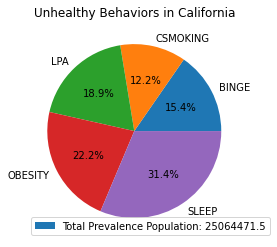

In [20]:
#filtering the data to only include the desired category and state 
data = df[(df['Category'] == 'Unhealthy Behaviors') & (df['State Desc'] == 'California')]

#calculating the total prevalence population
p_pop = data['Prevalence Population'].sum()

#calculating the values for each MeasureId 
measure_values = {}
for measure_id in data['Measure ID'].unique():
    measure_data = data[data['Measure ID'] == measure_id]
    measure_values[measure_id] = measure_data['Prevalence Population'].sum()

#creating a pie chart with the MeasureId values 
plt.figure()
plt.pie(measure_values.values(), labels=measure_values.keys(), autopct='%1.1f%%')

#adding legend with total prevalence population
plt.legend(['Total Prevalence Population: {}'.format(p_pop)], loc='lower left')

#adding the title
plt.title('Unhealthy Behaviors in California')

#saving the pie chart to png file 
plt.savefig('pie_chart_ca')

#showing the plot
plt.show()

The pie chart shows the percentage of Californians who has unhealthy behaviors. The largest percentage of Californians, 31.4% report getting insufficient sleep, followed by 22.2% who are obese, 18.9% reported a lack of physical activity, 15.4% reported binge drinking, and 12.2% smoked cigarettes.

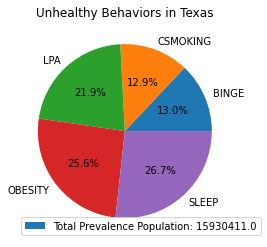

In [21]:
#filtering the data to only include the desired category and state 
data = df[(df['Category'] == 'Unhealthy Behaviors') & (df['State Desc'] == 'Texas')]

#calculating the total prevalence population
p_pop = data['Prevalence Population'].sum()

#calculating the values for each measure id  
measure_values = {}
for measure_id in data['Measure ID'].unique():
    measure_data = data[data['Measure ID'] == measure_id]
    measure_values[measure_id] = measure_data['Prevalence Population'].sum()

#creating a pie chart with the measure id values 
plt.figure()
plt.pie(measure_values.values(), labels=measure_values.keys(), autopct='%1.1f%%')

#adding legend with total prevalence population
plt.legend(['Total Prevalence Population: {}'.format(p_pop)], loc='lower left')

#adding the title
plt.title('Unhealthy Behaviors in Texas')

#saving the pie chart to png file 
plt.savefig('pie_chart_tx')

#showing the plot
plt.show()

The pie chart shows the percentage of Texans who has unhealthy behaviors. The largest percentage of Texans, 26.7% report getting insufficient sleep, followed by 25.6% who are obese, 21.9% reported a lack of physical activity, 13.0% reported binge drinking, and 12.9% smoked cigarettes.

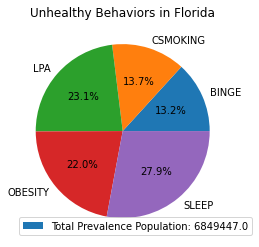

In [22]:
#filtering the data to only include the desired category and state 
data = df[(df['Category'] == 'Unhealthy Behaviors') & (df['State Desc'] == 'Florida')]

#calculating the total prevalence population
p_pop = data['Prevalence Population'].sum()

#calculating the values for each MeasureId 
measure_values = {}
for measure_id in data['Measure ID'].unique():
    measure_data = data[data['Measure ID'] == measure_id]
    measure_values[measure_id] = measure_data['Prevalence Population'].sum()

#creating a pie chart with the MeasureId values 
plt.figure()
plt.pie(measure_values.values(), labels=measure_values.keys(), autopct='%1.1f%%')

#adding legend with total prevalence population
plt.legend(['Total Prevalence Population: {}'.format(p_pop)], loc='lower left')

#adding the title
plt.title('Unhealthy Behaviors in Florida')

#saving the pie chart to png file 
plt.savefig('pie_chart_fl')

#showing the plot
plt.show()

The pie chart shows the percentage of Floridians has unhealthy behaviors. The largest percentage of Floridians, 27.9% report getting insufficient sleep, followed by 22.0% who are obese, 23.1% reported a lack of physical activity, 13.2% reported binge drinking, and 13.7% smoked cigarettes.

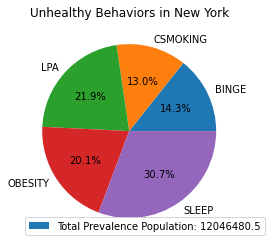

In [23]:
#filtering the data to only include the desired category and state 
data = df[(df['Category'] == 'Unhealthy Behaviors') & (df['State Desc'] == 'New York')]

#calculating the total prevalence population
p_pop = data['Prevalence Population'].sum()

#calculating the values for each measure id  
measure_values = {}
for measure_id in data['Measure ID'].unique():
    measure_data = data[data['Measure ID'] == measure_id]
    measure_values[measure_id] = measure_data['Prevalence Population'].sum()

#creating a pie chart with the measure id values 
plt.figure()
plt.pie(measure_values.values(), labels=measure_values.keys(), autopct='%1.1f%%')

#adding legend with total prevalence population
plt.legend(['Total Prevalence Population: {}'.format(p_pop)], loc='lower left')

#adding the title
plt.title('Unhealthy Behaviors in New York')

#saving the pie chart to png file 
plt.savefig('pie_chart_ny')

#showing the plot
plt.show()

The pie chart shows the percentage of New Yorkers has unhealthy behaviors. The largest percentage of New Yorkers, 30.7% report getting insufficient sleep, followed by 20.1% who are obese, 21.9% reported a lack of physical activity, 14.3% reported binge drinking, and 13.0% smoked cigarettes.

### Bar Graph
Creating two bar graphs to show the prevalence population with insurance and those who go for annual checkups. 

We will compare the states based on the prevalence population of people who get annual checkups and those who lack health insurance. This will provide insights into the potential market for the new low-cost drug, as even those without insurance may be interested in purchasing it.

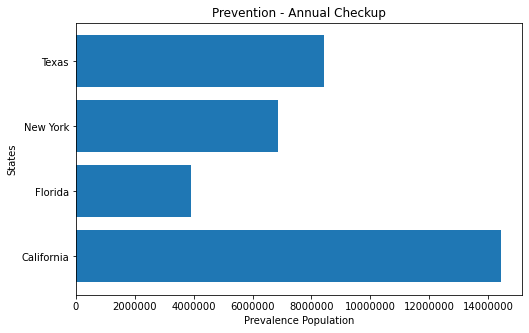

In [24]:
#filtering the data to only include the desired category and measure id 
data = df[(df['Category'] == 'Prevention') & (df['Measure ID'] == 'CHECKUP')]

#calculating the sum of prevalence population for each state
prevalence_pop_sum = data.groupby('State Desc')['Prevalence Population'].sum()

#creating the plot
fig, ax = plt.subplots(figsize=(8,5))
plt.ticklabel_format(style='plain')

#creating the bar graph 
ax.barh(prevalence_pop_sum.index, prevalence_pop_sum.values)

#adding the labels and title
ax.set_xlabel('Prevalence Population')
ax.set_ylabel('States')
ax.set_title('Prevention - Annual Checkup')

#saving the bar chart to png file 
plt.savefig('bar_chart_checkup')

#showing the plot
plt.show()

The bar graph shows the number of people who get an annual checkup in each state. The largest number of people who get an annual checkup are in California, with more than 14 million people. The next highest number of people who get an annual checkup are in Texas, with about 8.5 million people. Then New York with 7.0 million people. Lastly, the fewest number of people who get an annual checkup are in Florida, with about 4.0 million people.

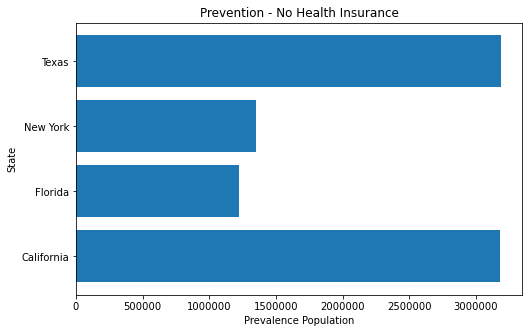

In [25]:
#filtering the data to only include the desired category and measure id 
data = df[(df['Category'] == 'Prevention') & (df['Measure ID'] == 'ACCESS2')]

#calculating the sum of prevalence population for each state
prevalence_pop_sum = data.groupby('State Desc')['Prevalence Population'].sum()

#creating the plot
fig, ax = plt.subplots(figsize=(8,5))
plt.ticklabel_format(style='plain')

#creating the bar graph 
ax.barh(prevalence_pop_sum.index, prevalence_pop_sum.values)

#adding the labels and title
ax.set_xlabel('Prevalence Population')
ax.set_ylabel('State')
ax.set_title('Prevention - No Health Insurance')

#saving the bar chart to png file 
plt.savefig('bar_chart_access')

#showing the plot
plt.show()

The bar graph shows the number of people without health insurance in each state. The largest number of people without health insurance are in Texas and California, with about 3.25 million people each. The next highest number of people without health insurance are in New York, with about 1.4 million people. The fewest number of people without health insurance are in Florida, with about 1.3 million people.

### Line Graph
Creating a line graph to plot the trend of diabetes for the four states. The disease with a higher count can be selected based on the prevalence population of diabetes in the states.

The line graph illustrates that California has a higher prevalence of physical health issues, mental health problems, and diabetes. However, as our new drug primarily treats diabetes, we have conducted further analysis specifically for diabetes using histogram, scatterplot, boxplot, and heatmap visualizations.

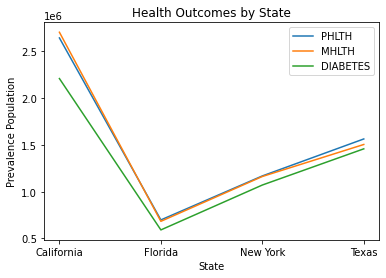

In [26]:
#filtering the data to include desired category and measure
category = 'Health Outcomes'
measure_ids = ['PHLTH', 'MHLTH', 'DIABETES']


#filtering the data to only include the desired category and measure id 
data = df[(df['Category'] == category) & (df['Measure ID'].isin(measure_ids))]

#grouping the data by state desc and measure id, and calculate the sum of prevalence population
grouped_data = data.groupby(['State Desc', 'Measure ID'])['Prevalence Population'].sum().reset_index()

#creating a line graph for each measure id 
for measure_id in measure_ids:
    measure_data = grouped_data[grouped_data['Measure ID'] == measure_id]
    plt.plot(measure_data['State Desc'], measure_data['Prevalence Population'], label=measure_id)
    
#adding the labels and title
plt.xlabel('State')
plt.ylabel('Prevalence Population')
plt.title(f'{category} by State')

#saving the line chart to png file 
plt.savefig('line_graph')

#adding a legend
plt.legend()

#showing the plot 
plt.show()

In reference to the prevalence populations, 

• California has the highest number of people with poor physical health, mental health, and diabetes.

• Texas has the second highest number of people with poor physical health, mental health, and diabetes.

• New York has the third highest number of people with poor physical health, mental health, and diabetes.

• Florida has the lowest number of people with poor physical health, mental health, and diabetes.

Based on the data and graphs above, if we want to launch our medicine for the state with high prevalence rates of diabetes, poor physical health, and poor mental health, we should choose California as it has the highest number of people with these conditions.

When compared to the respective prevalence population, California has the highest percentage of people who are obese, have insufficient sleep, and lack physical activity.

Furthermore, Californians has a high number of people who get annual checkups even though they have a large number of people without health insurance. This indicates that there are opportunities to promote and distribute the low-cost drug to everyone in California, regardless of their healthcare and insurance status.

### Histogram

Creating a histogram to show the distribution of data for diabetes for California. 

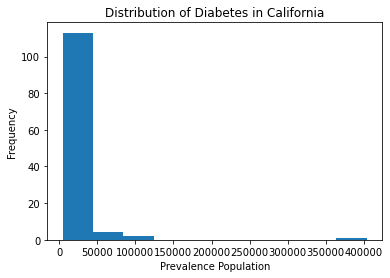

In [27]:
#filtering the data to include desired state and measure
ca_diabetes_data = df[(df['State Desc'] == 'California') & (df['Measure ID'] == 'DIABETES')]

#filtering the data to only include prevalence population 
prevalence_pop = ca_diabetes_data['Prevalence Population']

#creating a histogram with 10 bins
plt.hist(prevalence_pop, bins=10)

#adding labels and title 
plt.xlabel('Prevalence Population')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes in California')

#saving the histogram to png file 
plt.savefig('histogram_diabetes')

#showing the plot
plt.show()

The histogram is skewed to the left, showing that over 100 cities in California falls within the 0-40,000 prevalence population range for diabetes.

### Scatter Plot
Creating a scatter plots to show the linear relation between the prevalence population and population count for diabetes in California.

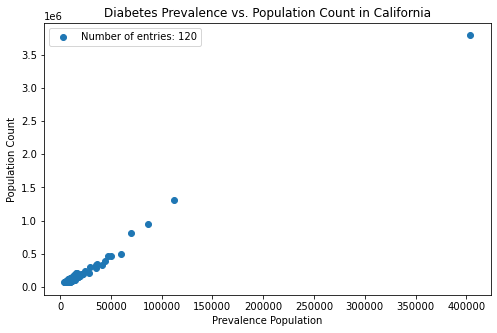

In [28]:
#filtering the data to include desired state, category, and measure
filtered_data = df[(df['State Desc'] == 'California') & (df['Category'] == 'Health Outcomes') & (df['Measure ID'] == 'DIABETES')]

#setting the values for x and y axis
x_values = filtered_data['Prevalence Population']
y_values = filtered_data['Population Count']

plt.subplots(figsize=(8,5))

#creating a scatter plot
plt.scatter(x_values, y_values)

#adding labels and title 
plt.xlabel('Prevalence Population')
plt.ylabel('Population Count')
plt.title('Diabetes Prevalence vs. Population Count in California')

#adding a legend and showing the number of entries/dots
num_entries = len(filtered_data)
legend_label = f'Number of entries: {num_entries}'
plt.legend([legend_label])

#saving the scatter plot to png file 
plt.savefig('scatter_plot_diabetes')

#saving the scatter to png file 
plt.savefig('scatter_diabetes')

#showing the plot
plt.show()

The scatter plot shows a positive correlation between diabetes prevalence and population count. As the population count increases, the diabetes prevalence also increases.

The relationship between diabetes prevalence and population count is approximately linear. The increase in diabetes prevalence is proportional to the increase in population count.

### Boxplots

Creating a boxplots to show the distribution of data, outlier(s), mean and median for the cities in California based on the the prevalence population of diabetes. 

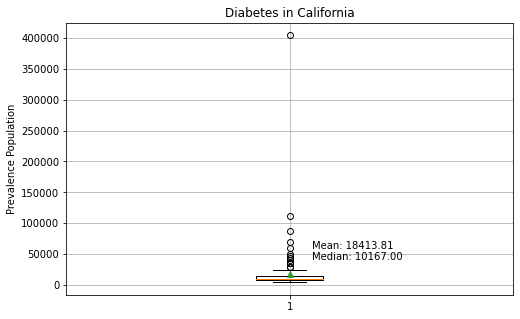

In [29]:
#filtering the data to include desired state, category, and measure
state_data = df[(df['State Desc'] == 'California') & (df['Category'] == 'Health Outcomes') & (df['Measure ID'] == 'DIABETES')]

#creating a box plot with prevalence population on y-axis
fig, ax = plt.subplots(figsize=(8,5))
plt.boxplot(state_data['Prevalence Population'], showmeans=True)

#adding labels and title 
plt.ylabel('Prevalence Population')
plt.title('Diabetes in California')

#adding text to show the mean and median 
mean_value = state_data['Prevalence Population'].mean()
median_value = state_data['Prevalence Population'].median()
text_str = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\n'
plt.text(1.05, mean_value, text_str, horizontalalignment='left', verticalalignment='bottom')

#adding gridlines
plt.grid(True)

#saving the box plot to png file
plt.savefig('box_diabetes')

#showing the plot
plt.show()

The boxplot analysis revealed that there are approximately 14 outlier cities with a higher prevalence population of diabetes that falls outside the 0-25,000 range. These cities are likely to have a higher number of people with diabetes compared to other cities. We can visualize these cities on a heat map, where the darker shades represent higher prevalence population.

### Heat Map
Creating a heat map to identify the top city in California with the highest number of people with diabetes to launch the drug.

In [34]:
import folium
from folium.plugins import HeatMap
from branca.colormap import LinearColormap

#filtering the data to include desired state and measure
df_ca = df[(df['State Desc'] == 'California') & (df['Measure ID'].isin(['DIABETES']))]

#creating a LinearColormap to map the values to colors
colormap = LinearColormap(colors=['green', 'yellow', 'red'], vmin=df_ca['Prevalence Population'].min(), vmax=df_ca['Prevalence Population'].max())

#creating a heat map of the prevalence population
m = folium.Map()
hm = HeatMap(
    data=df_ca[['Latitude','Longitude', 'Prevalence Population']],
    radius=10,
    min_opacity=0.7,
    gradient={0.0: 'green', 0.5: 'yellow', 1.0: 'red'},
    overlay=True,
    control=True,
)
hm.add_to(m)

#adding a legend to the map
colormap.caption = 'Prevalence Population'
m.add_child(colormap)

#showing the map
m


# Conclusion

Based on the analysis of health data for the states of TX, CA, NY, and FL, California appears to be the state with the highest prevalence of diabetes, poor physical health, and poor mental health. 

Additionally, when compared to the respective prevalence population, California has the highest percentage of people who are obese, have insufficient sleep, and lack physical activity. 

Los Angeles, in particular, has been identified as the city with the highest prevalence of diabetes in California. Therefore, it would be a wise decision to launch the new drug in Los Angeles, California. 

Furthermore, the data shows that despite having a large number of people without health insurance, a high number of people in California still get annual checkups, indicating that there is an opportunity to promote and distribute low-cost drug to everyone in California, regardless of their healthcare and insurance status.

# Recommendation

City and Tract FIPS:  These columns provide the Federal Information Processing Standards (FIPS) codes for the city and census tract, respectively. These codes could be useful if you want to merge this data with other datasets or if you want to analyze the data at a more granular level.

While the current dataset only considers the city level in the geographic level column, We can consider census tract information, which can allow us to investigate specific areas within the city and surrounding regions that may require more targeted interventions or healthcare services.  The Census tract's population size is between 50 to 28,960. 

Household Income: The average household income in California could be an important factor to consider since low-income individuals may be at a higher risk of developing chronic diseases due to lack of access to healthy foods and healthcare.

Ethnicity and Race: Including data on the ethnic and racial composition of California's population could help identify groups that may have higher rates of certain chronic diseases, allowing for targeted outreach and promotion of your medicine.

Access to Healthcare: Data on the number of healthcare providers and hospitals in California could help identify areas with limited access to healthcare services, where your medicine may be particularly beneficial.

Environmental factors: Adding data on environmental factors such as pollution levels, access to green spaces, and availability of healthy food options could help identify areas where interventions to improve the environment could help reduce the prevalence of chronic diseases.